## Tugas

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv. 
3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
    1. Menggunakan data spam.csv
    2. Fitur TF-IDF dengan mengaktifkan stop_words
    3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
    4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

In [5]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Read dataset
df = pd.read_csv('assets/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [6]:
df['label'] = df['label'].map({'female': 0, 'male': 1})

#### Langkah kedua: Cari korelasi antar label dengan fitur

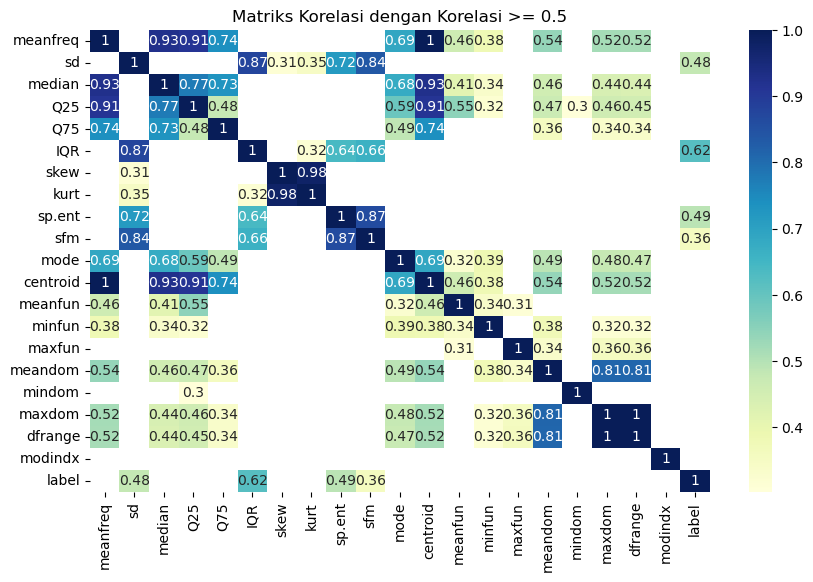

In [13]:
corr_matrix = df.corr()

high_corr_matrix = corr_matrix[corr_matrix >= 0.3]

high_corr_matrix[high_corr_matrix < 0.3] = None

plt.figure(figsize=(10, 6))
sns.heatmap(high_corr_matrix, cmap="YlGnBu", annot=True)
plt.title("Matriks Korelasi dengan Korelasi >= 0.5")
plt.show()

##### Langkah tiga: Pisahkan antara variabel dependen dan independen

In [16]:
# Menentukan variabel bebas X dan Y, dengan asumsi mengambil X dari sd, IQR, sp.ent
X1 = df['sd']
X2 = df['IQR']
X3 = df['sp.ent']
Y = df['label']

##### Langkah empat: Bagi data latih dan uji menjadi 7:3

In [17]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi data latih dan data uji dengan perbandingan 7:3
X1_train, X1_test, X2_train, X2_test, X3_train, X3_test, Y_train, Y_test = train_test_split(X1, X2, X3, Y, test_size=0.3, random_state=100)

##### Langkah lima: Buat model SVM

In [18]:
from sklearn.svm import SVC
X_train = np.column_stack((X1_train, X2_train))

# Inisialisasi model SVM
model = SVC(kernel='rbf', C=5.0, gamma=0.5)
model.fit(X_train, Y_train)

SVC(C=5.0, gamma=0.5)

#### Langkah enam: Melakukan prediksi pada data uji

In [19]:
X_test = np.column_stack((X1_test, X2_test))

Y_pred = model.predict(X_test)

#### Langkah tujuh: Mengevaluasi model yang telah dibuat

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluasi performa model

accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{report}')

Accuracy: 0.8853838065194533
Confusion Matrix:
[[384  87]
 [ 22 458]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       471
           1       0.84      0.95      0.89       480

    accuracy                           0.89       951
   macro avg       0.89      0.88      0.88       951
weighted avg       0.89      0.89      0.88       951

